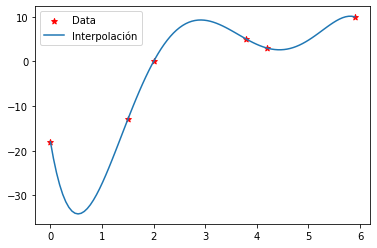

In [11]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
filename = 'InterpolacionNewtonNoequi.csv'
urllib.request.urlretrieve(url, filename)
Data = pd.read_csv(url)

X = np.float64(Data.X)
Y = np.float64(Data.Y)
xi = np.linspace(X[0],X[-1],100)

def Newton_Gregory(X, Y, xi):
   
    n = len(X)
    diferencias_finitas = np.zeros((n, n))
    for i in range(n):
        diferencias_finitas[i][0] = Y[i]
    for j in range(1, n):
        for i in range(n - j):
            diferencias_finitas[i][j] = (diferencias_finitas[i + 1][j - 1] - diferencias_finitas[i][j - 1]) / (X[i + j] - X[i])

    Coeficientes = []
    for u in xi:
        yi = 0
        for j in range(n):
            prod = diferencias_finitas[0][j]
            for i in range(j):
                prod *= (u - X[i])
            yi += prod
        Coeficientes.append(yi)

    return Coeficientes

yj = Newton_Gregory(X,Y,xi)

plt.scatter(X,Y,color='r',marker='*', label = "Data")
plt.plot(xi,yj, label = "Interpolación")
plt.legend(loc = "upper left")